### Problem 2

In [76]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_roc_curve, balanced_accuracy_score, accuracy_score
from sklearn.linear_model import LogisticRegression, LassoCV, LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("sgn.csv")
df.head()

,x,y
0,-3.141593,-0.971757
1,-3.135303,-0.991672
2,-3.129014,-1.102480
3,-3.122724,-0.930356
4,-3.116435,-0.895885


In [38]:
def find_coef(m, model):
    plt.close()
    sns.scatterplot(x = df['x'], y = df['y'], s = 3)

    df_use = df.copy()
    
    for i in range(m):
        df_use[f'sin{i+1}'] = np.sin(df['x']*i)
        df_use[f'cos{i+1}'] = np.cos(df['x']*i)
    
    X = df_use.iloc[:, 2:]
    y = df_use['y']
    
    model.fit(X, y)
    
    print(model.coef_)
    print(model.intercept_)
    
    y_pred = model.predict(X)
    
    sns.lineplot(x = df['x'], y = y_pred, color = 'r');

In [39]:
model = LinearRegression()

[0. 0.]
-0.0044526341156887386


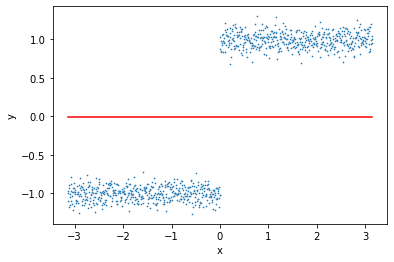

In [40]:
find_coef(1, model)

[ 0.00000000e+00 -5.85469173e-18  1.26491679e+00  1.52178093e-03
  2.62664126e-04  1.22063343e-03  4.25026998e-01 -6.30254496e-03
 -3.80589168e-03 -3.55254045e-03]
-0.004455082972697763


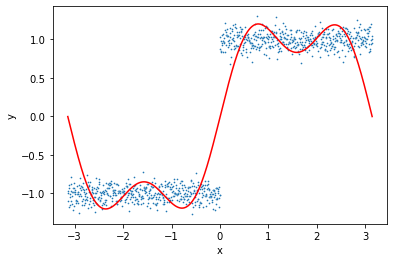

In [41]:
find_coef(5, model)

[-9.47492701e+11  7.42630463e+13  1.26108984e+00 -1.01705868e-03
  7.75369961e-05  6.87643368e-03  4.24842945e-01 -1.27358087e-02
 -4.06464382e-03  2.97018368e-03  2.57325181e-01  4.84231632e-03
  1.93168990e-03  4.92330868e-03  1.89458179e-01 -1.01705868e-03
 -7.98540889e-04 -2.88919132e-03  1.40813376e-01  4.84231632e-03
  1.67708757e-03 -8.27977723e-04  1.22588146e-01 -1.08907723e-02
 -5.24861997e-03 -1.65610663e-02  1.01400320e-01 -1.01705868e-03
 -6.56255805e-03 -2.88919132e-03  8.29782483e-02 -1.01705868e-03
  6.11938666e-03  5.03139728e-03  7.35380325e-02  7.19889125e-04
  3.34425332e-03 -2.67301412e-03  7.44297067e-02 -4.92330868e-03]
-74263046340382.89


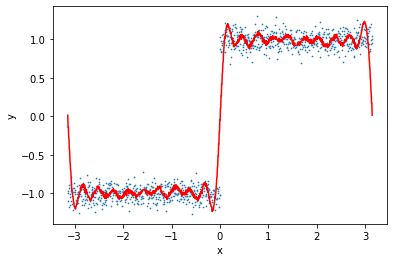

In [42]:
find_coef(20, model)

[-2.86041594e+11  2.37913662e+13  1.26831055e+00  3.51562500e-02
  2.77860744e-04  2.09980814e-03  4.24995694e-01 -9.40703369e-03
 -3.76503854e-03  1.49767431e-04  2.57351285e-01 -3.12058988e-03
  2.59151210e-03  6.40776027e-03  1.89049993e-01 -3.17923128e-03
 -1.60120541e-03 -5.40964712e-04  1.40091447e-01 -6.17171829e-03
  1.91605285e-03 -4.89724488e-03  1.22256080e-01 -8.76593496e-03
 -5.56123963e-03 -5.25789679e-03  1.00617855e-01  1.91013403e-03
 -5.35067210e-03 -9.36198060e-04  8.42720812e-02  6.73902684e-04
  7.13099035e-03  2.04611323e-03  7.43513555e-02  4.74967194e-03
  2.95401317e-03 -1.86941393e-04  7.39700751e-02 -5.44968534e-03
  2.02436596e-03  1.46847875e-03  5.94943443e-02 -6.05433278e-03
 -4.80090034e-04  5.52612824e-03  5.39056390e-02 -4.41285739e-03
  1.14725552e-03  5.25296002e-03  5.35808251e-02 -1.04217774e-03
 -5.07243014e-03 -5.07398738e-03  4.76972651e-02 -9.29975057e-04
 -7.06116586e-03  4.02144968e-03  4.74864144e-02 -1.33993910e-03
  3.39704897e-03 -4.48208

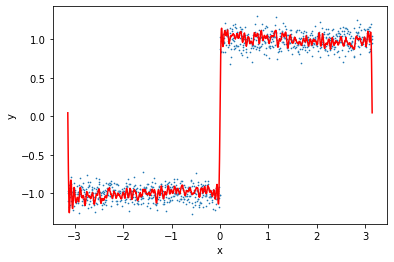

In [43]:
find_coef(100, model)

[-1.88304127e+08 -1.37637844e+08  3.64057959e+09 ... -1.17691688e+08
  7.81520851e+09  0.00000000e+00]
137637844.02540275


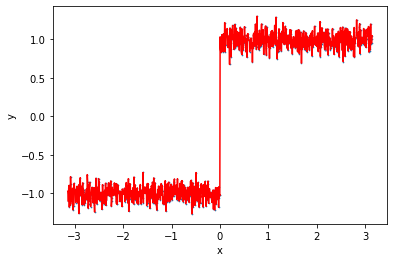

In [44]:
find_coef(1000, model) # совсем переобучился........

### Problem 3

In [45]:
lasso = LassoCV()

[ 0.          0.          1.16231549 ... -0.          0.
  0.        ]
-0.004452634115688679


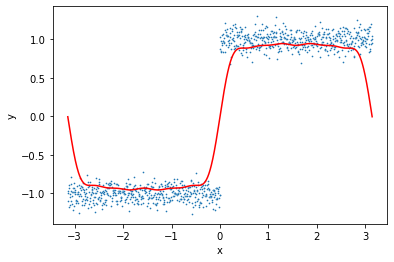

In [46]:
find_coef(1000, lasso) 

Здесь, в отличии от модели без регуляризации, не происходит переобучения - линия идет ровно в зоне большого скопления точек, не подстраиваясь под отдельные точки. Такая модель будет выдавать меньше точность на тренировочной выборке, зато больше на тестовой.

### Problem 4 

In [47]:
df = pd.read_csv('BRCA_pam50.tsv', sep = '\t', index_col = 0)
df = df.loc[(df['Subtype'] == 'Luminal A')| (df['Subtype'] == 'Luminal B')]

df.head(3)

,UBE2T,BIRC5,NUF2,CDC6,CCNB1,TYMS,MYBL2,CEP55,MELK,NDC80,...,NAT1,FOXA1,BLVRA,MMP11,GPR160,FGFR4,GRB7,TMEM45B,ERBB2,Subtype
TCGA-A1-A0SD-01A,3.016158,2.514871,1.509129,1.354016,3.685035,2.125453,3.047474,2.333704,1.996853,1.171520,...,4.905805,6.677118,5.044878,5.631087,3.942169,3.404177,3.655783,2.757977,5.999041,Luminal A
TCGA-A1-A0SE-01A,4.626989,3.289047,2.102190,2.116975,4.525954,2.906470,3.798966,2.745027,2.451070,2.070499,...,6.053451,6.690114,5.843557,5.504526,3.881691,1.038253,3.156081,1.355837,5.585759,Luminal A
TCGA-A1-A0SF-01A,3.417782,2.262844,1.569301,1.800667,3.823694,2.843952,3.807282,2.141323,2.082400,1.693568,...,6.883599,6.280921,5.705410,3.511572,4.374803,2.299735,3.054917,1.315680,5.215699,Luminal A


In [48]:
X = df.iloc[:, :-1].to_numpy()
y = df['Subtype'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                    random_state = 17)

Линейный SVM (class_weight="balanced"):

In [52]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear', class_weight = 'balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Balanced accuracy, SVM: ', balanced_accuracy_score(y_pred, y_test))

Balanced accuracy, SVM:  0.8696969696969697


Линейный SVM, построенный на топ-2 признаках(относительно модулей весов):

In [72]:
coef = model.coef_[0]
genes = df.iloc[:,:-1].T
genes['coef'] = np.abs(coef)
print(genes.sort_values(by = 'coef').iloc[-2:].index.to_list())

['BIRC5', 'BAG1']


In [73]:
df2 = df[['BIRC5', 'BAG1', 'Subtype']]
X2 = df2.iloc[:, :-1].to_numpy()
y2 = df2['Subtype'].to_numpy()

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify = y,
                                                        random_state = 17)
model = SVC(kernel = 'linear', class_weight = 'balanced')

model.fit(X2_train, y2_train)
y_pred = model.predict(X2_test)

print('Balanced accuracy, SVM with two genes: ', balanced_accuracy_score(y2_test, y_pred))

Balanced accuracy, SVM with two genes:  0.7747994934571549


Логистическая регрессия с параметрамиclass_weight="balanced C=0.01, penalty="l1 solver="liblinear". При использовании train_test_split с random_state=17 методвыдаст два ненулевых коэффициента:

In [74]:
reg = LogisticRegression(class_weight = 'balanced', C = 0.01, penalty = 'l1',
                         solver = 'liblinear')

reg.fit(X_train, y_train)

print(reg.coef_)

y_pred = reg.predict(X_test)

print('Balanced accuracy, logistic regression: ', balanced_accuracy_score(y_pred, y_test))

[[ 0.          0.          0.          0.          0.          0.
   0.2709315   0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.         -0.36148648  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]]
Balanced accuracy, logistic regression:  0.7992673992673993


### Problem 5

In [77]:
np.random.seed(17)
r = 0

for M in range(10000):
    X = np.random.normal(loc = 0, size = (20, 2))
    y = np.array([0]*10 + [1]*10)
    model = LogisticRegression(penalty = 'none')
    model.fit(X, y)
    y_pred = model.predict(X)
    
    if accuracy_score(y, y_pred) == 1:
        r += 1

print(r/10000)

0.0002
